# EDA For Reported Cases Dataset

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
df = pd.read_csv("../data/processed/reported_cases_cleaned.csv")

## Basic Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84870 entries, 0 to 84869
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   group                84870 non-null  object
 1   code                 84870 non-null  object
 2   name                 84870 non-null  object
 3   year                 84870 non-null  int64 
 4   disease              84870 non-null  object
 5   disease_description  84870 non-null  object
 6   cases                84870 non-null  int64 
 7   is_zero_cases        84870 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 5.2+ MB


In [4]:
df.head()

,group,code,name,year,disease,disease_description,cases,is_zero_cases
0,COUNTRIES,ABW,Aruba,2023,CRS,Congenital Rubella Syndrome,0,1
1,COUNTRIES,ABW,Aruba,2023,DIPHTHERIA,Diphtheria,0,1
2,COUNTRIES,ABW,Aruba,2023,INVASIVE_MENING,Invasive Meningococcal Disease,1,0
3,COUNTRIES,ABW,Aruba,2023,MEASLES,Measles,0,1
4,COUNTRIES,ABW,Aruba,2023,MUMPS,Mumps,0,1


In [5]:
df.isnull().sum()

group                  0
code                   0
name                   0
year                   0
disease                0
disease_description    0
cases                  0
is_zero_cases          0
dtype: int64

In [6]:
df.shape

(84870, 8)

## Summary Statistics

In [7]:
df.describe(include = 'all')

,group,code,name,year,disease,disease_description,cases,is_zero_cases
count,84870,84870,84870,84870.000000,84870,84870,8.487000e+04,84870.000000
unique,4,222,222,NaN,14,14,NaN,NaN
top,COUNTRIES,GLOBAL,Global,NaN,MEASLES,Measles,NaN,NaN
freq,82054,424,424,NaN,9196,9196,NaN,NaN
mean,NaN,NaN,NaN,2004.084647,NaN,NaN,3.450084e+03,0.610216
std,NaN,NaN,NaN,14.348035,NaN,NaN,5.373614e+04,0.487704
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000
25%,NaN,NaN,NaN,1994.000000,NaN,NaN,0.000000e+00,0.000000
50%,NaN,NaN,NaN,2005.000000,NaN,NaN,0.000000e+00,1.000000
75%,NaN,NaN,NaN,2015.000000,NaN,NaN,2.000000e+01,1.000000


## Distribution of Reported Cases

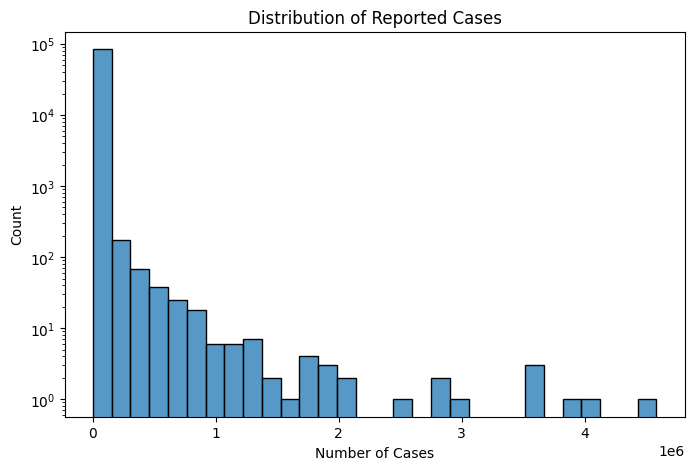

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['cases'], bins=30, kde=False)
plt.title("Distribution of Reported Cases")
plt.xlabel("Number of Cases")
plt.ylabel("Count")
plt.yscale("log")   # log scale for better visualization
plt.savefig("../output/Reported_Cases/Distribution of Reported Cases.png")
plt.show()

## Trend of reported cases over time (global total)

In [9]:
yearly_cases = df.groupby("year")['cases'].sum().reset_index()

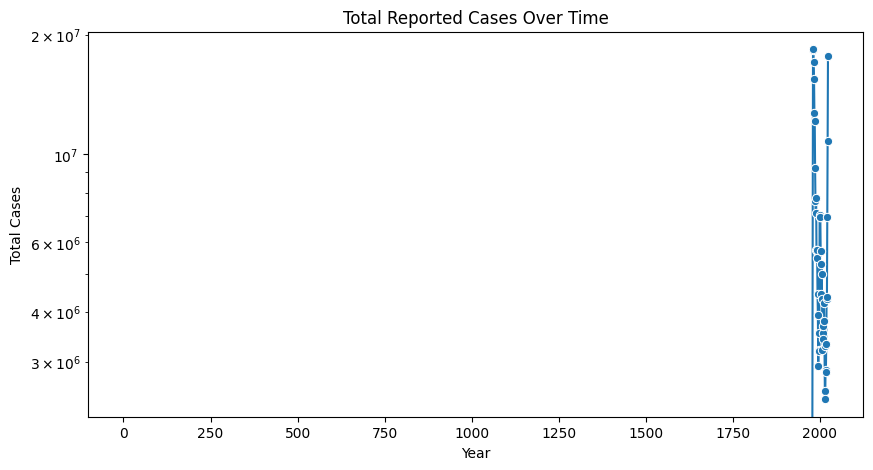

In [10]:
plt.figure(figsize=(10,5))
sns.lineplot(data=yearly_cases, x="year", y="cases", marker="o")
plt.title("Total Reported Cases Over Time")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.yscale("log")
plt.savefig("../output/Reported_Cases/Total Reported Cases Over Time.png")
plt.show()

## Top 10 diseases by total reported cases

In [11]:
top_diseases = df.groupby("disease_description")['cases'].sum().sort_values(ascending=False).head(10)

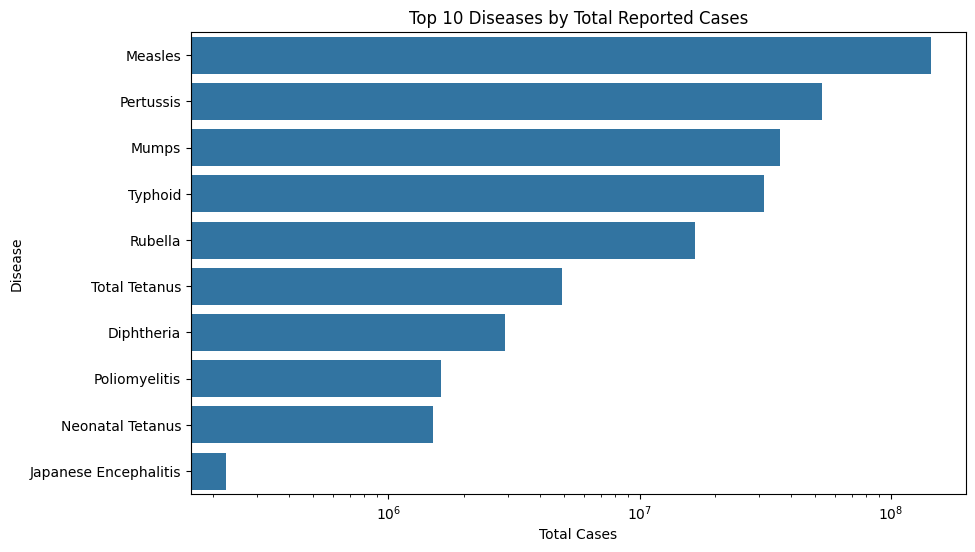

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_diseases.values, y=top_diseases.index)
plt.title("Top 10 Diseases by Total Reported Cases")
plt.xlabel("Total Cases")
plt.ylabel("Disease")
plt.xscale("log")
plt.savefig("../output/Reported_Cases/Top 10 Diseases by Total Reported Cases.png")
plt.show()

## Yearly trends for selected diseases

In [13]:
selected_diseases = ["MEASLES", "TYPHOID", "MUMPS", "PERTUSSIS", "RUBELLA"]

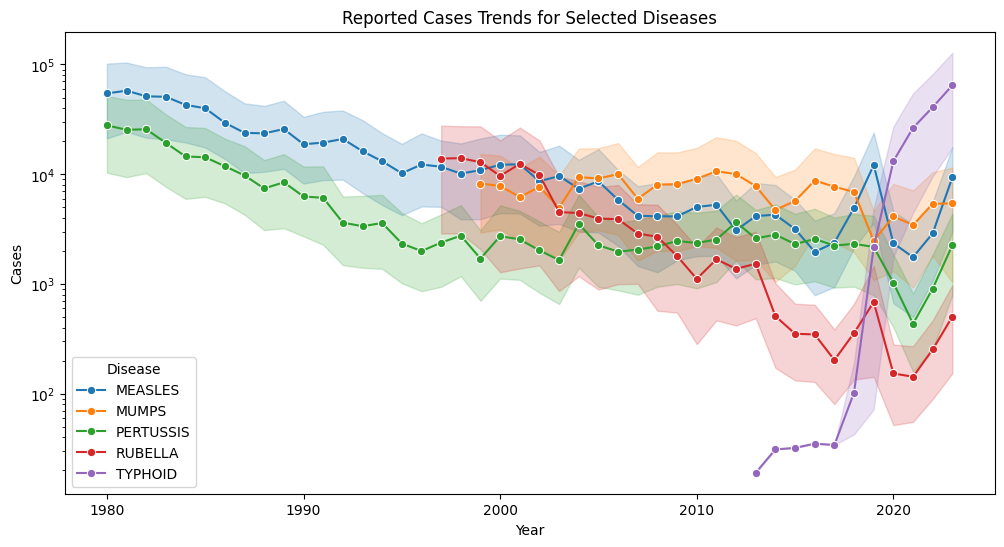

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df[df['disease'].isin(selected_diseases)],
             x="year", y="cases", hue="disease", marker="o")
plt.title("Reported Cases Trends for Selected Diseases")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.yscale("log")
plt.legend(title="Disease")
plt.savefig("../output/Reported_Cases/Reported Cases Trends for Selected Diseases.png")
plt.show()

## Country-level analysis

In [15]:
selected_countries = ["India", "Brazil"]

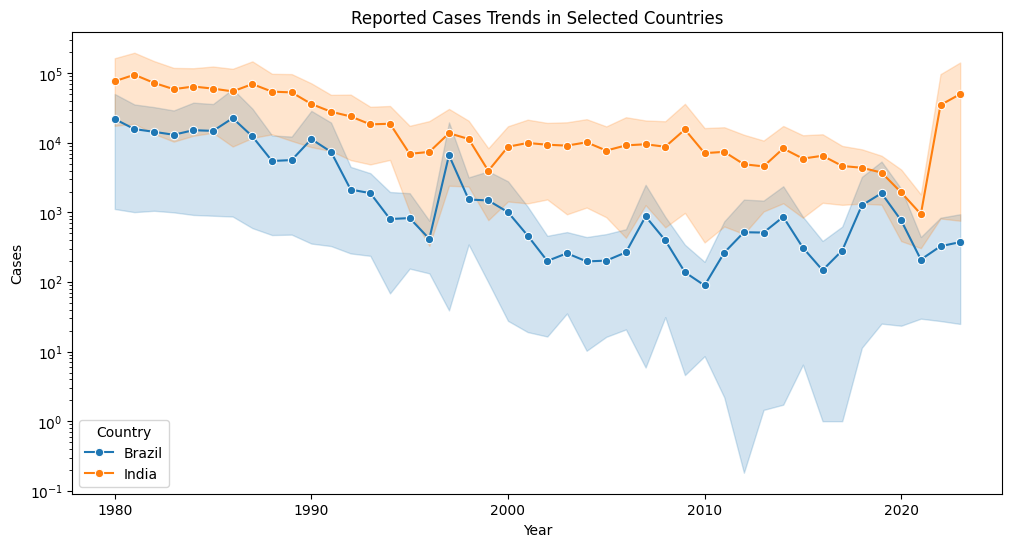

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df[df['name'].isin(selected_countries)],
             x="year", y="cases", hue="name", marker="o")
plt.title("Reported Cases Trends in Selected Countries")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.yscale("log")
plt.legend(title="Country")
plt.savefig("../output/Reported_Cases/Reported Cases Trends in Selected Countries.png")
plt.show()

##  Correlation Analysis (numeric only)

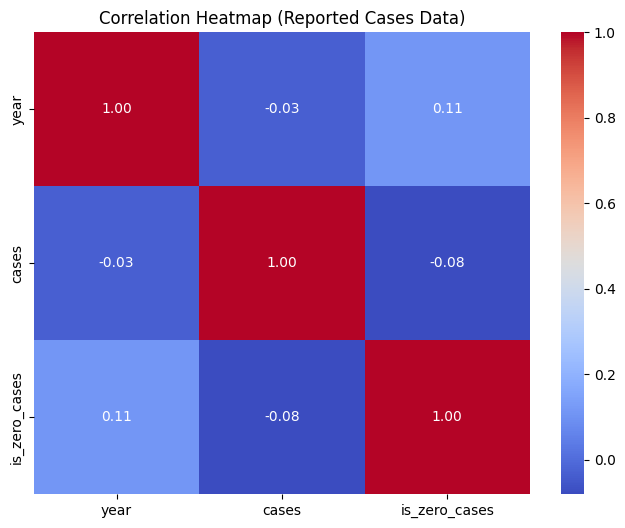

In [17]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Reported Cases Data)")
plt.savefig("../output/Reported_Cases/Correlation Heatmap (Reported Cases Data).png")
plt.show()